In [1]:
%run methods.ipynb

In [4]:
#Republicanos Donald Trump
data = clean_data_from_json('./FicherosJSON/P2REPUBLICANS_10000.json',5000)
# return [cleanData, df, numeros_list, popularidad_list, len(numero)]
dataClearData = data[0]
dataDf = data[1]


In [ ]:
#Dibujar grafica Sentimental
numeros_list = data[2]
popularidad_list = data[3]
numero = data[4]
GraficarDatos(numeros_list, popularidad_list, numero, "Sentimientos sobre los tuits: Republicans")


In [9]:
#REALIZAR PARA TODOS
graph = relaciones_network(df)

numNodes = len(graph.node())
numEdges = len(graph.edges())
#list(nx.chain_decomposition(graph))

In [10]:
sentimentNode = updateSentimentNode(graph)

In [119]:
G = nx.path_graph(3)
attrs = {0: {'attr1': 20, 'attr2': 'nothing'}, 1: {'attr2': 3}}
nx.set_node_attributes(G, attrs)
print(G.nodes[0]['attr1'])

print(G.nodes[0]['attr2'])

print(G.nodes[1]['attr2'])

print(G.nodes(data=True))

20
nothing
3
[(0, {'attr1': 20, 'attr2': 'nothing'}), (1, {'attr2': 3}), (2, {})]


In [130]:
G = nx.path_graph(3)
print(G.nodes(data=True))

pos = nx.spring_layout(G)
print(pos)

    
nx.write_graphml(G, "g.graphml")

[(0, {}), (1, {}), (2, {})]
{0: array([-1.        , -0.54963875]), 1: array([0.00052528, 0.0002889 ]), 2: array([0.99947472, 0.54934985])}


In [ ]:
#Republicans
print(numNodes)
print(numEdges)

In [ ]:
#Republicans ASSORTATIVITY
r=nx.degree_assortativity_coefficient(graph)

d=nx.average_neighbor_degree(graph, source='in', target='in')

print(r)
print ('\n')

In [ ]:
#Degree GLOBAL
degreeEachNode=nx.degree(graph)
x = []
for lista, listb in degreeEachNode:
    x.append(listb)
    
#IN-DEGREE
degreeEachNode = nx.in_degree_centrality(graph)
x = degreeEachNode.values()

y = d.values()
plt.loglog(x,y,'.')
plt.xlabel("Grado centralizado de entrada")
plt.show()

#OUT-DEGREE
degreeEachNode = nx.out_degree_centrality(graph)

x = degreeEachNode.values()
y = d.values()

plt.loglog(x,y,'.')
plt.xlabel("Grado centralizado de salida")
plt.show()




In [ ]:
bb = nx.edge_betweenness_centrality(graph, normalized=False)
nx.set_edge_attributes(graph, bb, 'betweenness')


In [ ]:
edges,weights = zip(*nx.get_edge_attributes(graph,'betweenness').items())
pos = nx.spring_layout(graph)
nx.draw(graph, pos, node_color='b', node_size=10 ,edgelist=edges, edge_color=weights, width=2.0, edge_cmap=plt.cm.RdYlGn, with_labels = False)
#nx.write_graphml(graph, "betweenness.graphml", prettyprint=True)

In [ ]:
#Republicans DENSITY
nx.density(graph)

In [11]:
graph.remove_edges_from(nx.selfloop_edges(graph))
graph = nx.k_core(graph,k=5)

graph = graph.to_undirected()
spring_pos = nx.spring_layout(graph)
edges,weights = zip(*nx.get_edge_attributes(graph,'sentiment').items())

In [14]:
for node,(x,y) in spring_pos.items():
    graph.node[node]['x'] = float(x)
    graph.node[node]['y'] = float(y)
    

NetworkXError: GraphML writer does not support <class 'list'> as data values.

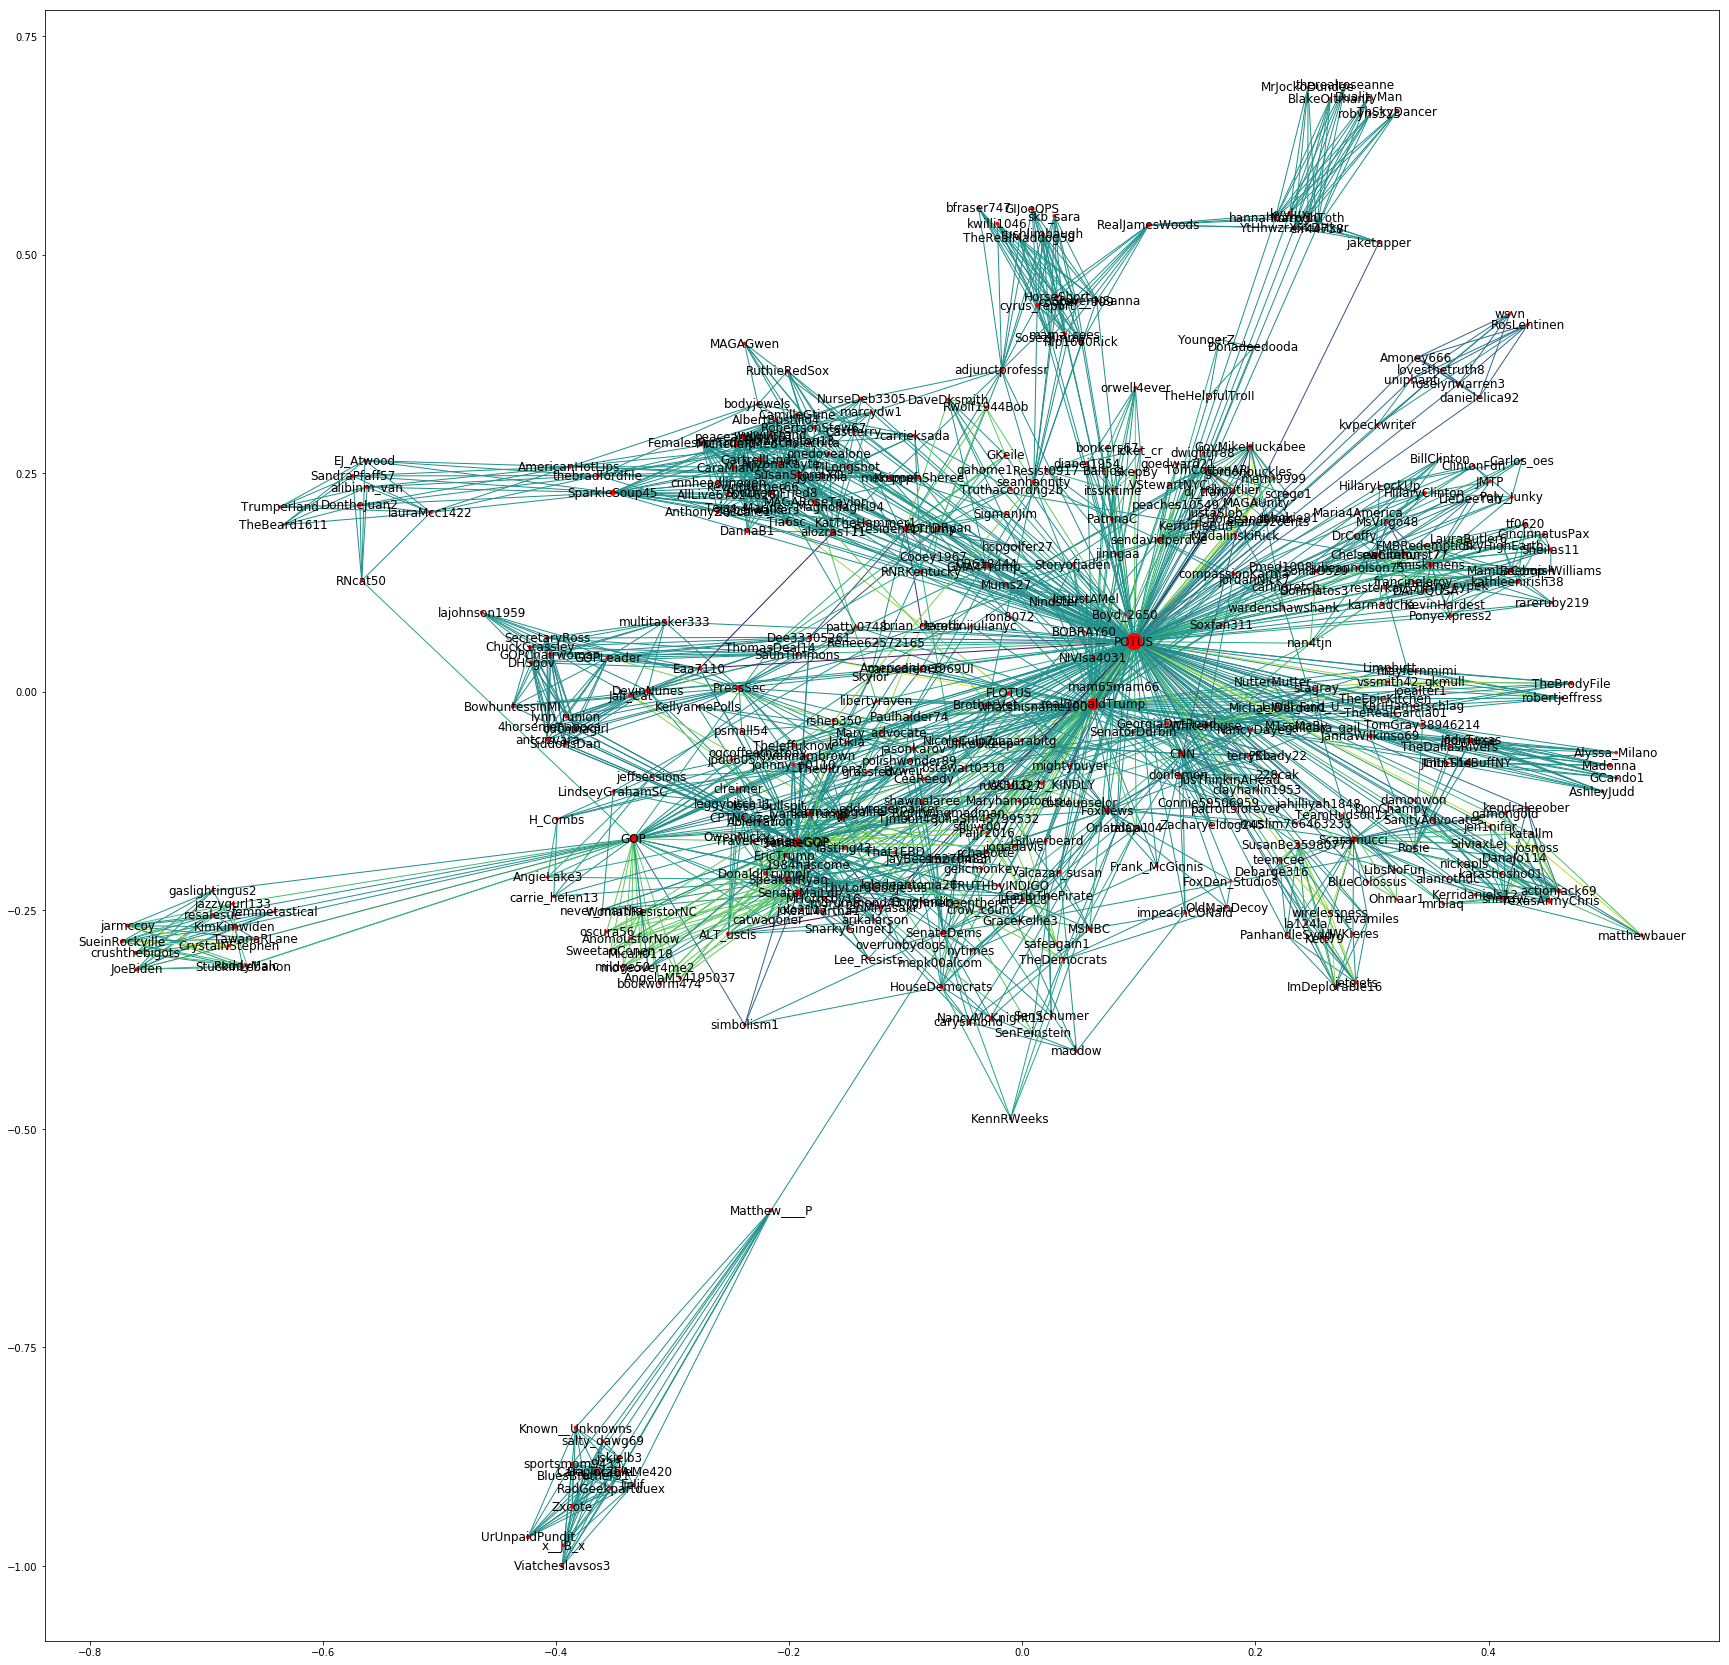

In [15]:

#pos = nx.spring_layout(graph)
#plt.axis("off")
plt.figure(figsize=(30,30))
spring_pos = nx.spring_layout(graph)
size_node = [val for (node, val) in graph.degree()]
#nx.draw(graph, pos, node_color=sentimentNode, node_size=500 ,edgelist=edges, edge_color='b', width=2.0, edge_cmap=plt.cm.RdYlGn, with_labels = True)
nx.draw_networkx(graph, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color ='r', node_size = size_node, edge_color=weights, edgelist=edges, with_labels = True)
#plt.savefig("graphRepublicsEnlaces.png", dpi=1000)
nx.write_graphml(graph, "semtimentRepublicans.graphml", prettyprint=True)

In [31]:
#Comunidades 
graph = graph.to_undirected()
c = list(greedy_modularity_communities(graph))

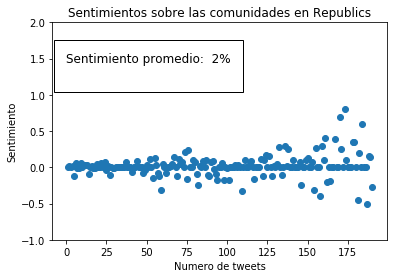

In [32]:
cadaComunidad = []
numeroDeComunidades = 0
listaDeComunidades = []
dataCadaComunLda=[]
for comunity in c:
    dataParaLDA = []
    sentComunity = [] 
    laComidad = comunity
    for namePerson in laComidad:
        row = df.loc[df['screen_name'] == namePerson]
        tuitLimpio = tweet_clean(row['text'])
        sentComunity.append(sentimentalAnalis(tuitLimpio))
        dataParaLDA.append(tuitLimpio)
    dataCadaComunLda.append(dataParaLDA)
    numeroDeComunidades +=1
    listaDeComunidades.append(numeroDeComunidades)
    cadaComunidad.append(sum(sentComunity)/len(sentComunity))
    
numeroDeComunidades = len(cadaComunidad)
GraficarDatos(listaDeComunidades, cadaComunidad, numeroDeComunidades, "Sentimientos sobre las comunidades en Republics")
    
        

In [38]:
len(dataCadaComunLda)

190

In [34]:
resultData = dict()
varCont = 0
for eachdata in dataCadaComunLda:
    resultData[varCont] = ldaMethod(eachdata, 15)
    varCont +=1
    


LDA
[(10, '0.136*"name" + 0.136*"object" + 0.136*"text" + 0.136*"dtype" + 0.069*"seri" + 0.017*"record" + 0.017*"close" + 0.016*"dow" + 0.009*"comment" + 0.008*"77th"'), (14, '0.058*"fuck" + 0.035*"object" + 0.033*"languag" + 0.031*"dtype" + 0.031*"text" + 0.031*"name" + 0.021*"use" + 0.020*"time" + 0.018*"anthoni" + 0.017*"say"'), (4, '0.024*"dtype" + 0.024*"text" + 0.024*"object" + 0.024*"name" + 0.011*"get" + 0.008*"durbin" + 0.008*"money" + 0.006*"come" + 0.006*"see" + 0.006*"time"'), (2, '0.071*"object" + 0.071*"text" + 0.071*"dtype" + 0.071*"name" + 0.023*"word" + 0.018*"like" + 0.015*"take" + 0.014*"insult" + 0.014*"import" + 0.013*"british"'), (7, '0.020*"report" + 0.017*"name" + 0.017*"dtype" + 0.017*"text" + 0.017*"object" + 0.017*"victor" + 0.016*"say" + 0.016*"trump" + 0.015*"direct" + 0.015*"think"')]
PERPLEXITY
-5.945852654813482
COHERENCE:
0.3327136261039986
LDA
[(4, '0.067*"name" + 0.066*"text" + 0.066*"dtype" + 0.066*"object" + 0.011*"amp" + 0.009*"racist" + 0.009*"exp

COHERENCE:
0.3996892769683266
LDA
[(12, '0.014*"age" + 0.014*"state" + 0.014*"1310" + 0.014*"threat" + 0.014*"talk" + 0.014*"punch" + 0.014*"like" + 0.014*"lie" + 0.014*"3335" + 0.014*"say"'), (1, '0.195*"object" + 0.195*"text" + 0.195*"name" + 0.195*"dtype" + 0.175*"seri" + 0.001*"hypocrisi" + 0.001*"533" + 0.001*"1310" + 0.001*"lie" + 0.001*"caught"'), (3, '0.075*"name" + 0.075*"object" + 0.075*"text" + 0.075*"dtype" + 0.039*"está" + 0.039*"engañada" + 0.039*"esa" + 0.039*"2530" + 0.039*"má" + 0.039*"lusinchi"'), (6, '0.139*"1310" + 0.139*"caught" + 0.139*"lie" + 0.009*"name" + 0.009*"object" + 0.009*"text" + 0.009*"dtype" + 0.009*"punch" + 0.009*"talk" + 0.009*"threat"'), (11, '0.014*"name" + 0.014*"object" + 0.014*"seri" + 0.014*"text" + 0.014*"dtype" + 0.014*"threat" + 0.014*"talk" + 0.014*"like" + 0.014*"state" + 0.014*"1310"')]
PERPLEXITY
-4.119018111910139
COHERENCE:
0.417717167007706
LDA
[(5, '0.014*"would" + 0.014*"oust" + 0.014*"long" + 0.014*"give" + 0.014*"get" + 0.014*"cr

COHERENCE:
0.4255052712204689
LDA
[(0, '0.100*"1030" + 0.100*"dtype" + 0.100*"name" + 0.100*"object" + 0.100*"text" + 0.100*"seri" + 0.100*"3134" + 0.100*"1913" + 0.100*"flip" + 0.100*"flynn"'), (3, '0.100*"dtype" + 0.100*"name" + 0.100*"object" + 0.100*"text" + 0.100*"seri" + 0.100*"1030" + 0.100*"3134" + 0.100*"1913" + 0.100*"flip" + 0.100*"flynn"'), (5, '0.100*"1030" + 0.100*"dtype" + 0.100*"name" + 0.100*"object" + 0.100*"text" + 0.100*"seri" + 0.100*"3134" + 0.100*"1913" + 0.100*"flip" + 0.100*"flynn"'), (1, '0.100*"dtype" + 0.100*"name" + 0.100*"object" + 0.100*"text" + 0.100*"seri" + 0.100*"1030" + 0.100*"3134" + 0.100*"1913" + 0.100*"flip" + 0.100*"flynn"'), (8, '0.139*"dtype" + 0.139*"name" + 0.139*"object" + 0.139*"text" + 0.138*"1913" + 0.138*"flip" + 0.138*"flynn" + 0.010*"seri" + 0.009*"1030" + 0.009*"3134"')]
PERPLEXITY
-3.096331019680221
COHERENCE:
0.47253076363675706
LDA
[(14, '0.062*"name" + 0.062*"object" + 0.062*"text" + 0.062*"dtype" + 0.062*"goe" + 0.062*"year" + 0

COHERENCE:
0.457697699663954
LDA
[(10, '0.140*"dtype" + 0.140*"name" + 0.140*"object" + 0.140*"text" + 0.140*"1104" + 0.140*"joe" + 0.140*"old" + 0.009*"2871" + 0.009*"seri"'), (3, '0.111*"2871" + 0.111*"dtype" + 0.111*"name" + 0.111*"object" + 0.111*"text" + 0.111*"seri" + 0.111*"1104" + 0.111*"joe" + 0.111*"old"'), (1, '0.199*"dtype" + 0.199*"name" + 0.199*"object" + 0.199*"text" + 0.199*"seri" + 0.001*"2871" + 0.001*"1104" + 0.001*"joe" + 0.001*"old"'), (11, '0.111*"2871" + 0.111*"dtype" + 0.111*"name" + 0.111*"object" + 0.111*"text" + 0.111*"seri" + 0.111*"1104" + 0.111*"joe" + 0.111*"old"'), (8, '0.111*"2871" + 0.111*"dtype" + 0.111*"name" + 0.111*"object" + 0.111*"text" + 0.111*"seri" + 0.111*"1104" + 0.111*"joe" + 0.111*"old"')]
PERPLEXITY
-3.099873200843209
COHERENCE:
0.4930296393367186
LDA
[(3, '0.143*"dtype" + 0.143*"name" + 0.143*"object" + 0.143*"text" + 0.143*"seri" + 0.142*"293" + 0.142*"3117"'), (4, '0.143*"dtype" + 0.143*"name" + 0.143*"object" + 0.143*"text" + 0.143*"s

COHERENCE:
0.37490041695480386
LDA
[(0, '0.111*"dtype" + 0.111*"name" + 0.111*"object" + 0.111*"seri" + 0.111*"text" + 0.111*"3501" + 0.111*"make" + 0.111*"ohio" + 0.111*"sro"'), (5, '0.111*"dtype" + 0.111*"name" + 0.111*"object" + 0.111*"seri" + 0.111*"text" + 0.111*"3501" + 0.111*"make" + 0.111*"ohio" + 0.111*"sro"'), (6, '0.124*"3501" + 0.124*"make" + 0.124*"ohio" + 0.124*"sro" + 0.124*"dtype" + 0.124*"name" + 0.124*"object" + 0.124*"text" + 0.008*"seri"'), (13, '0.111*"dtype" + 0.111*"name" + 0.111*"object" + 0.111*"seri" + 0.111*"text" + 0.111*"3501" + 0.111*"make" + 0.111*"ohio" + 0.111*"sro"'), (14, '0.111*"dtype" + 0.111*"name" + 0.111*"object" + 0.111*"seri" + 0.111*"text" + 0.111*"3501" + 0.111*"make" + 0.111*"ohio" + 0.111*"sro"')]
PERPLEXITY
-3.07512067258358
COHERENCE:
0.5549464297295367
LDA
[(1, '0.167*"dtype" + 0.167*"name" + 0.167*"object" + 0.167*"seri" + 0.167*"text" + 0.167*"3886"'), (14, '0.167*"dtype" + 0.167*"name" + 0.167*"object" + 0.167*"seri" + 0.167*"text" + 

COHERENCE:
0.45763473716823744
LDA
[(10, '0.050*"object" + 0.050*"seri" + 0.050*"dtype" + 0.050*"text" + 0.050*"name" + 0.050*"grammi" + 0.050*"know" + 0.050*"dozen" + 0.050*"rest" + 0.050*"peopl"'), (8, '0.050*"1384" + 0.050*"text" + 0.050*"rest" + 0.050*"peopl" + 0.050*"make" + 0.050*"know" + 0.050*"grammi" + 0.050*"dozen" + 0.050*"america" + 0.050*"2549"'), (5, '0.050*"1384" + 0.050*"text" + 0.050*"rest" + 0.050*"peopl" + 0.050*"make" + 0.050*"know" + 0.050*"grammi" + 0.050*"dozen" + 0.050*"america" + 0.050*"2549"'), (12, '0.050*"1384" + 0.050*"text" + 0.050*"rest" + 0.050*"peopl" + 0.050*"make" + 0.050*"know" + 0.050*"grammi" + 0.050*"dozen" + 0.050*"america" + 0.050*"2549"'), (1, '0.050*"1384" + 0.050*"text" + 0.050*"rest" + 0.050*"peopl" + 0.050*"make" + 0.050*"know" + 0.050*"grammi" + 0.050*"dozen" + 0.050*"america" + 0.050*"2549"')]
PERPLEXITY
-3.933371890336275
COHERENCE:
0.2830490789055272
LDA
[(0, '0.083*"derecho" + 0.083*"4979" + 0.083*"tordillo" + 0.083*"terribl" + 0.083*"

COHERENCE:
0.6310379021566147
LDA
[(3, '0.111*"dtype" + 0.111*"name" + 0.111*"object" + 0.111*"seri" + 0.111*"text" + 0.111*"309" + 0.111*"clinton" + 0.111*"nafta" + 0.111*"start"'), (2, '0.111*"dtype" + 0.111*"name" + 0.111*"object" + 0.111*"seri" + 0.111*"text" + 0.111*"309" + 0.111*"clinton" + 0.111*"nafta" + 0.111*"start"'), (10, '0.111*"dtype" + 0.111*"name" + 0.111*"object" + 0.111*"seri" + 0.111*"text" + 0.111*"309" + 0.111*"clinton" + 0.111*"nafta" + 0.111*"start"'), (11, '0.111*"dtype" + 0.111*"name" + 0.111*"object" + 0.111*"seri" + 0.111*"text" + 0.111*"309" + 0.111*"clinton" + 0.111*"nafta" + 0.111*"start"'), (9, '0.111*"dtype" + 0.111*"name" + 0.111*"object" + 0.111*"seri" + 0.111*"text" + 0.111*"309" + 0.111*"clinton" + 0.111*"nafta" + 0.111*"start"')]
PERPLEXITY
-3.467547278319086
COHERENCE:
0.5548656507089509
LDA
[(5, '0.143*"dtype" + 0.143*"name" + 0.143*"object" + 0.143*"seri" + 0.143*"text" + 0.142*"567" + 0.142*"actual"'), (6, '0.143*"dtype" + 0.143*"name" + 0.143*"

COHERENCE:
0.48344823026201406
LDA
[(8, '0.083*"debemo" + 0.083*"3881" + 0.083*"estan" + 0.083*"equivocado" + 0.083*"enfrentar" + 0.083*"dtype" + 0.083*"comu" + 0.083*"object" + 0.083*"seri" + 0.083*"name"'), (1, '0.083*"debemo" + 0.083*"3881" + 0.083*"estan" + 0.083*"equivocado" + 0.083*"enfrentar" + 0.083*"dtype" + 0.083*"comu" + 0.083*"object" + 0.083*"seri" + 0.083*"name"'), (0, '0.084*"dtype" + 0.084*"object" + 0.084*"seri" + 0.084*"text" + 0.084*"name" + 0.083*"equivocado" + 0.083*"estan" + 0.083*"3881" + 0.083*"enfrentar" + 0.083*"comu"'), (5, '0.196*"dtype" + 0.196*"object" + 0.196*"seri" + 0.196*"text" + 0.196*"name" + 0.003*"equivocado" + 0.003*"estan" + 0.003*"3881" + 0.003*"enfrentar" + 0.003*"comu"'), (11, '0.083*"debemo" + 0.083*"3881" + 0.083*"estan" + 0.083*"equivocado" + 0.083*"enfrentar" + 0.083*"dtype" + 0.083*"comu" + 0.083*"object" + 0.083*"seri" + 0.083*"name"')]
PERPLEXITY
-3.672905646985577
COHERENCE:
0.5944768130046449
LDA
[(4, '0.178*"object" + 0.178*"name" + 

COHERENCE:
0.5944637788679413
LDA
[(0, '0.032*"retire" + 0.032*"studi" + 0.032*"much" + 0.032*"name" + 0.032*"norwegian" + 0.032*"object" + 0.032*"rat" + 0.032*"low" + 0.032*"wage" + 0.032*"want"'), (12, '0.032*"retire" + 0.032*"studi" + 0.032*"much" + 0.032*"name" + 0.032*"norwegian" + 0.032*"object" + 0.032*"rat" + 0.032*"low" + 0.032*"wage" + 0.032*"want"'), (4, '0.032*"retire" + 0.032*"studi" + 0.032*"much" + 0.032*"name" + 0.032*"norwegian" + 0.032*"object" + 0.032*"rat" + 0.032*"low" + 0.032*"wage" + 0.032*"want"'), (8, '0.180*"name" + 0.180*"object" + 0.180*"dtype" + 0.180*"text" + 0.180*"seri" + 0.004*"rat" + 0.004*"studi" + 0.004*"norwegian" + 0.004*"move" + 0.004*"would"'), (14, '0.032*"univers" + 0.032*"health" + 0.032*"crime" + 0.032*"colleg" + 0.032*"even" + 0.032*"dtype" + 0.032*"behind" + 0.032*"move" + 0.032*"rat" + 0.032*"care"')]
PERPLEXITY
-4.8521149833997095
COHERENCE:
0.8498763751927528
LDA
[(13, '0.100*"dtype" + 0.100*"name" + 0.100*"object" + 0.100*"seri" + 0.100

COHERENCE:
0.5944637788679413
LDA
[(9, '0.048*"countri" + 0.048*"2713" + 0.048*"stole" + 0.048*"serious" + 0.048*"nutjob" + 0.048*"low" + 0.048*"lol" + 0.048*"help" + 0.048*"govern" + 0.048*"follow"'), (4, '0.048*"countri" + 0.048*"2713" + 0.048*"stole" + 0.048*"serious" + 0.048*"nutjob" + 0.048*"low" + 0.048*"lol" + 0.048*"help" + 0.048*"govern" + 0.048*"follow"'), (2, '0.048*"countri" + 0.048*"2713" + 0.048*"stole" + 0.048*"serious" + 0.048*"nutjob" + 0.048*"low" + 0.048*"lol" + 0.048*"help" + 0.048*"govern" + 0.048*"follow"'), (14, '0.065*"low" + 0.065*"text" + 0.065*"govern" + 0.065*"follow" + 0.065*"countri" + 0.065*"dtype" + 0.065*"2476" + 0.065*"lol" + 0.065*"nutjob" + 0.065*"serious"'), (6, '0.048*"countri" + 0.048*"2713" + 0.048*"stole" + 0.048*"serious" + 0.048*"nutjob" + 0.048*"low" + 0.048*"lol" + 0.048*"help" + 0.048*"govern" + 0.048*"follow"')]
PERPLEXITY
-4.5772764367215775
COHERENCE:
0.34754670225992396
LDA
[(13, '0.100*"2108" + 0.100*"dtype" + 0.100*"get" + 0.100*"name

COHERENCE:
0.5629098612550603
LDA
[(4, '0.059*"low" + 0.059*"hey" + 0.059*"saw" + 0.059*"rate" + 0.059*"poll" + 0.059*"ottawa" + 0.059*"nntrump" + 0.059*"mistakenli" + 0.059*"dtype" + 0.059*"4749"'), (6, '0.059*"low" + 0.059*"hey" + 0.059*"saw" + 0.059*"rate" + 0.059*"poll" + 0.059*"ottawa" + 0.059*"nntrump" + 0.059*"mistakenli" + 0.059*"dtype" + 0.059*"4749"'), (7, '0.059*"low" + 0.059*"hey" + 0.059*"saw" + 0.059*"rate" + 0.059*"poll" + 0.059*"ottawa" + 0.059*"nntrump" + 0.059*"mistakenli" + 0.059*"dtype" + 0.059*"4749"'), (8, '0.190*"dtype" + 0.190*"object" + 0.190*"seri" + 0.190*"text" + 0.190*"name" + 0.004*"nntrump" + 0.004*"saw" + 0.004*"rate" + 0.004*"poll" + 0.004*"ottawa"'), (10, '0.059*"low" + 0.059*"hey" + 0.059*"saw" + 0.059*"rate" + 0.059*"poll" + 0.059*"ottawa" + 0.059*"nntrump" + 0.059*"mistakenli" + 0.059*"dtype" + 0.059*"4749"')]
PERPLEXITY
-4.1987913846969604
COHERENCE:
0.6808392817900902
LDA
[(12, '0.083*"corpor" + 0.083*"4809" + 0.083*"regulatori" + 0.083*"paid" + 0

COHERENCE:
0.5591153700862532
LDA
[(13, '0.056*"incroy" + 0.056*"brault" + 0.056*"retrouvé" + 0.056*"qui" + 0.056*"mène" + 0.056*"lorsqu" + 0.056*"jusqu" + 0.056*"interview" + 0.056*"dtype" + 0.056*"destin"'), (0, '0.056*"incroy" + 0.056*"brault" + 0.056*"retrouvé" + 0.056*"qui" + 0.056*"mène" + 0.056*"lorsqu" + 0.056*"jusqu" + 0.056*"interview" + 0.056*"dtype" + 0.056*"destin"'), (14, '0.056*"incroy" + 0.056*"brault" + 0.056*"retrouvé" + 0.056*"qui" + 0.056*"mène" + 0.056*"lorsqu" + 0.056*"jusqu" + 0.056*"interview" + 0.056*"dtype" + 0.056*"destin"'), (12, '0.056*"incroy" + 0.056*"une" + 0.056*"retrouvé" + 0.056*"object" + 0.056*"mène" + 0.056*"brault" + 0.056*"text" + 0.056*"interview" + 0.056*"jusqu" + 0.056*"name"'), (3, '0.059*"dtype" + 0.059*"name" + 0.059*"text" + 0.059*"object" + 0.059*"destin" + 0.059*"qui" + 0.059*"an" + 0.059*"avait" + 0.059*"lorsqu" + 0.059*"2240"')]
PERPLEXITY
-4.546784520149231
COHERENCE:
0.6953327571758174
LDA
[(12, '0.078*"still" + 0.040*"1160" + 0.040*

COHERENCE:
0.6127658445251207
LDA
[(11, '0.085*"name" + 0.085*"object" + 0.085*"text" + 0.085*"seri" + 0.085*"dtype" + 0.082*"state" + 0.082*"young" + 0.082*"love" + 0.082*"stay" + 0.082*"sometim"'), (14, '0.083*"state" + 0.083*"object" + 0.083*"young" + 0.083*"text" + 0.083*"stay" + 0.083*"4639" + 0.083*"sometim" + 0.083*"dtype" + 0.083*"love" + 0.083*"anyth"'), (8, '0.083*"state" + 0.083*"object" + 0.083*"young" + 0.083*"text" + 0.083*"stay" + 0.083*"4639" + 0.083*"sometim" + 0.083*"dtype" + 0.083*"love" + 0.083*"anyth"'), (9, '0.083*"state" + 0.083*"object" + 0.083*"young" + 0.083*"text" + 0.083*"stay" + 0.083*"4639" + 0.083*"sometim" + 0.083*"dtype" + 0.083*"love" + 0.083*"anyth"'), (5, '0.090*"stay" + 0.090*"4639" + 0.090*"young" + 0.090*"love" + 0.090*"anyth" + 0.090*"sometim" + 0.090*"state" + 0.090*"text" + 0.090*"object" + 0.090*"dtype"')]
PERPLEXITY
-4.173033396402995
COHERENCE:
0.5944512632179357
LDA
[(7, '0.165*"dtype" + 0.165*"name" + 0.165*"object" + 0.165*"text" + 0.165*

COHERENCE:
0.6953293109491993
LDA
[(13, '0.071*"make" + 0.071*"awe" + 0.071*"psychopath" + 0.071*"person" + 0.071*"nnwhi" + 0.071*"movi" + 0.071*"dtype" + 0.071*"go" + 0.071*"object" + 0.071*"text"'), (10, '0.077*"make" + 0.077*"awe" + 0.077*"psychopath" + 0.077*"person" + 0.077*"nnwhi" + 0.077*"movi" + 0.077*"dtype" + 0.077*"go" + 0.077*"object" + 0.077*"text"'), (0, '0.071*"make" + 0.071*"awe" + 0.071*"psychopath" + 0.071*"person" + 0.071*"nnwhi" + 0.071*"movi" + 0.071*"dtype" + 0.071*"go" + 0.071*"object" + 0.071*"text"'), (3, '0.071*"make" + 0.071*"awe" + 0.071*"psychopath" + 0.071*"person" + 0.071*"nnwhi" + 0.071*"movi" + 0.071*"dtype" + 0.071*"go" + 0.071*"object" + 0.071*"text"'), (8, '0.071*"make" + 0.071*"awe" + 0.071*"psychopath" + 0.071*"person" + 0.071*"nnwhi" + 0.071*"movi" + 0.071*"dtype" + 0.071*"go" + 0.071*"object" + 0.071*"text"')]
PERPLEXITY
-4.720248364739948
COHERENCE:
0.6310133075707581
LDA
[(13, '0.071*"legal" + 0.071*"american" + 0.071*"racist" + 0.071*"presid" 

COHERENCE:
0.5628811441331771
LDA
[(13, '0.071*"million" + 0.071*"keep" + 0.071*"year" + 0.071*"text" + 0.071*"object" + 0.071*"name" + 0.071*"3618" + 0.071*"last" + 0.071*"dtype" + 0.071*"give"'), (10, '0.180*"seri" + 0.180*"dtype" + 0.180*"text" + 0.180*"object" + 0.180*"name" + 0.011*"million" + 0.011*"year" + 0.011*"3618" + 0.011*"gave" + 0.011*"haiti"'), (0, '0.071*"million" + 0.071*"keep" + 0.071*"year" + 0.071*"text" + 0.071*"object" + 0.071*"name" + 0.071*"3618" + 0.071*"last" + 0.071*"dtype" + 0.071*"give"'), (3, '0.071*"million" + 0.071*"keep" + 0.071*"year" + 0.071*"text" + 0.071*"object" + 0.071*"name" + 0.071*"3618" + 0.071*"last" + 0.071*"dtype" + 0.071*"give"'), (8, '0.071*"million" + 0.071*"keep" + 0.071*"year" + 0.071*"text" + 0.071*"object" + 0.071*"name" + 0.071*"3618" + 0.071*"last" + 0.071*"dtype" + 0.071*"give"')]
PERPLEXITY
-4.610695214647996
COHERENCE:
0.6310133075707578
LDA
[(10, '0.062*"power" + 0.062*"diminish" + 0.062*"tru" + 0.062*"thank" + 0.062*"speak" + 

COHERENCE:
1.0
LDA
[(14, '0.071*"supremacist" + 0.071*"right" + 0.071*"trump" + 0.071*"threat" + 0.071*"text" + 0.071*"terror" + 0.071*"706" + 0.071*"safeti" + 0.071*"dtype" + 0.071*"name"'), (3, '0.071*"supremacist" + 0.071*"right" + 0.071*"trump" + 0.071*"threat" + 0.071*"text" + 0.071*"terror" + 0.071*"706" + 0.071*"safeti" + 0.071*"dtype" + 0.071*"name"'), (12, '0.071*"supremacist" + 0.071*"right" + 0.071*"trump" + 0.071*"threat" + 0.071*"text" + 0.071*"terror" + 0.071*"706" + 0.071*"safeti" + 0.071*"dtype" + 0.071*"name"'), (6, '0.071*"supremacist" + 0.071*"right" + 0.071*"trump" + 0.071*"threat" + 0.071*"text" + 0.071*"terror" + 0.071*"706" + 0.071*"safeti" + 0.071*"dtype" + 0.071*"name"'), (4, '0.071*"supremacist" + 0.071*"right" + 0.071*"trump" + 0.071*"threat" + 0.071*"text" + 0.071*"terror" + 0.071*"706" + 0.071*"safeti" + 0.071*"dtype" + 0.071*"name"')]
PERPLEXITY
-4.858714580535889
COHERENCE:
1.0
LDA
[(11, '0.083*"one" + 0.083*"ndoesn" + 0.083*"say" + 0.083*"room" + 0.083*"

COHERENCE:
1.0
LDA
[(11, '0.083*"object" + 0.083*"media" + 0.083*"train" + 0.083*"text" + 0.083*"oper" + 0.083*"2282" + 0.083*"name" + 0.083*"dtype" + 0.083*"javelin" + 0.083*"armi"'), (9, '0.083*"object" + 0.083*"media" + 0.083*"train" + 0.083*"text" + 0.083*"oper" + 0.083*"2282" + 0.083*"name" + 0.083*"dtype" + 0.083*"javelin" + 0.083*"armi"'), (7, '0.083*"object" + 0.083*"media" + 0.083*"train" + 0.083*"text" + 0.083*"oper" + 0.083*"2282" + 0.083*"name" + 0.083*"dtype" + 0.083*"javelin" + 0.083*"armi"'), (0, '0.083*"object" + 0.083*"media" + 0.083*"train" + 0.083*"text" + 0.083*"oper" + 0.083*"2282" + 0.083*"name" + 0.083*"dtype" + 0.083*"javelin" + 0.083*"armi"'), (14, '0.083*"object" + 0.083*"media" + 0.083*"train" + 0.083*"text" + 0.083*"oper" + 0.083*"2282" + 0.083*"name" + 0.083*"dtype" + 0.083*"javelin" + 0.083*"armi"')]
PERPLEXITY
-4.735262314478557
COHERENCE:
1.0
LDA
[(12, '0.067*"name" + 0.067*"malnutrit" + 0.067*"took" + 0.067*"text" + 0.067*"teenag" + 0.067*"one" + 0.067*

COHERENCE:
1.0
LDA
[(12, '0.067*"record" + 0.067*"object" + 0.067*"text" + 0.067*"surg" + 0.067*"stock" + 0.067*"start" + 0.067*"sinc" + 0.067*"2003" + 0.067*"close" + 0.067*"best"'), (0, '0.067*"record" + 0.067*"object" + 0.067*"text" + 0.067*"surg" + 0.067*"stock" + 0.067*"start" + 0.067*"sinc" + 0.067*"2003" + 0.067*"close" + 0.067*"best"'), (4, '0.067*"record" + 0.067*"object" + 0.067*"text" + 0.067*"surg" + 0.067*"stock" + 0.067*"start" + 0.067*"sinc" + 0.067*"2003" + 0.067*"close" + 0.067*"best"'), (13, '0.067*"record" + 0.067*"object" + 0.067*"text" + 0.067*"surg" + 0.067*"stock" + 0.067*"start" + 0.067*"sinc" + 0.067*"2003" + 0.067*"close" + 0.067*"best"'), (11, '0.067*"record" + 0.067*"object" + 0.067*"text" + 0.067*"surg" + 0.067*"stock" + 0.067*"start" + 0.067*"sinc" + 0.067*"2003" + 0.067*"close" + 0.067*"best"')]
PERPLEXITY
-4.914849718411763
COHERENCE:
1.0
LDA
[(3, '0.059*"name" + 0.059*"mortal" + 0.059*"sam" + 0.059*"rate" + 0.059*"point" + 0.059*"plan" + 0.059*"parentho

COHERENCE:
1.0
LDA
[(14, '0.071*"nwhi" + 0.071*"nin" + 0.071*"senat" + 0.071*"republicansnin" + 0.071*"republicansn" + 0.071*"object" + 0.071*"239" + 0.071*"none" + 0.071*"dtype" + 0.071*"hous"'), (3, '0.071*"nwhi" + 0.071*"nin" + 0.071*"senat" + 0.071*"republicansnin" + 0.071*"republicansn" + 0.071*"object" + 0.071*"239" + 0.071*"none" + 0.071*"dtype" + 0.071*"hous"'), (12, '0.071*"nwhi" + 0.071*"nin" + 0.071*"senat" + 0.071*"republicansnin" + 0.071*"republicansn" + 0.071*"object" + 0.071*"239" + 0.071*"none" + 0.071*"dtype" + 0.071*"hous"'), (6, '0.071*"nwhi" + 0.071*"nin" + 0.071*"senat" + 0.071*"republicansnin" + 0.071*"republicansn" + 0.071*"object" + 0.071*"239" + 0.071*"none" + 0.071*"dtype" + 0.071*"hous"'), (4, '0.071*"nwhi" + 0.071*"nin" + 0.071*"senat" + 0.071*"republicansnin" + 0.071*"republicansn" + 0.071*"object" + 0.071*"239" + 0.071*"none" + 0.071*"dtype" + 0.071*"hous"')]
PERPLEXITY
-4.858714580535889
COHERENCE:
1.0
LDA
[(12, '0.067*"hous" + 0.067*"dtype" + 0.067*"put"